# Convolutional Neural Networks and Computer Vision with TensorFlow - Pizza and Steak

### Get the data
#### Dataset link: https://www.kaggle.com/dansbecker/food-101

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip
pizza_steak_zip = zipfile.ZipFile("pizza_steak.zip")
pizza_steak_zip.extractall()
pizza_steak_zip.close()

--2022-01-18 06:41:30--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.182.144, 142.250.77.176, 142.250.193.176, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.182.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  7.31MB/s    in 19s     

2022-01-18 06:41:53 (5.49 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [1]:
!ls pizza_steak/train/steak | head

1000205.jpg
100135.jpg
101312.jpg
1021458.jpg
1032846.jpg
10380.jpg
1049459.jpg
1053665.jpg
1068516.jpg
1068975.jpg
ls: write error: Broken pipe


In [2]:
!ls pizza_steak/train/steak | wc -l

750


In [3]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [4]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [5]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [6]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup the target directory (we'll view images from here)
    target_folder = target_dir+target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)
    
    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    print(f"Image shape: {img.shape}") # show the shape of the image
    
    return img

['3128495.jpg']
Image shape: (512, 512, 3)


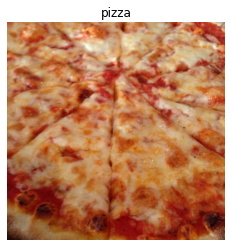

In [7]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [12]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[179,  79,  47],
        [178,  78,  44],
        [177,  77,  43],
        ...,
        [164, 134, 108],
        [166, 135, 107],
        [151, 120,  92]],

       [[180,  80,  48],
        [178,  80,  45],
        [177,  77,  43],
        ...,
        [160, 130, 104],
        [162, 130, 105],
        [154, 123,  95]],

       [[181,  82,  50],
        [179,  82,  47],
        [178,  80,  45],
        ...,
        [161, 134, 107],
        [163, 133, 107],
        [164, 134, 108]],

       ...,

       [[ 29,  14,  11],
        [ 29,  15,  12],
        [ 31,  18,  12],
        ...,
        [ 91,  56,  36],
        [ 97,  62,  43],
        [ 90,  55,  36]],

       [[ 28,  14,  11],
        [ 29,  15,  12],
        [ 30,  16,  13],
        ...,
        [116,  83,  64],
        [ 95,  60,  41],
        [ 83,  48,  29]],

       [[ 24,  10,   7],
        [ 25,  11,   8],
        [ 25,  14,  10],
        ...,
        [104,  71,  5

In [13]:
type(img), img.shape

(numpy.ndarray, (512, 512, 3))

In [14]:
# scale/normalize the data, as neural networks love values between 0 & 1)
img / 255.

array([[[0.70196078, 0.30980392, 0.18431373],
        [0.69803922, 0.30588235, 0.17254902],
        [0.69411765, 0.30196078, 0.16862745],
        ...,
        [0.64313725, 0.5254902 , 0.42352941],
        [0.65098039, 0.52941176, 0.41960784],
        [0.59215686, 0.47058824, 0.36078431]],

       [[0.70588235, 0.31372549, 0.18823529],
        [0.69803922, 0.31372549, 0.17647059],
        [0.69411765, 0.30196078, 0.16862745],
        ...,
        [0.62745098, 0.50980392, 0.40784314],
        [0.63529412, 0.50980392, 0.41176471],
        [0.60392157, 0.48235294, 0.37254902]],

       [[0.70980392, 0.32156863, 0.19607843],
        [0.70196078, 0.32156863, 0.18431373],
        [0.69803922, 0.31372549, 0.17647059],
        ...,
        [0.63137255, 0.5254902 , 0.41960784],
        [0.63921569, 0.52156863, 0.41960784],
        [0.64313725, 0.5254902 , 0.42352941]],

       ...,

       [[0.11372549, 0.05490196, 0.04313725],
        [0.11372549, 0.05882353, 0.04705882],
        [0.12156863, 0

In [15]:
# from sklearn.preprocessing import MinMaxScaler
# min_max_scaler = MinMaxScaler()
# min_max_scaler.fit(img)

# ValueError: Found array with dim 3. MinMaxScaler expected <= 2.

### For building the end to end CNN, below steps will be followed:
* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [16]:
# import modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set random seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                              batch_size=32,
                                              target_size=(224, 224),
                                              class_mode="binary",
                                              seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                              batch_size=32,
                                              target_size=(224, 224),
                                              class_mode="binary",
                                              seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [21]:
# Build CNN model

# import modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam

# create model
model_1 = Sequential([
    Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    #MaxPool2D(pool_size=2, padding="valid"),
    
    Conv2D(10, 3, activation="relu"),
    # Conv2D(10, 3, activation="relu"),
    # MaxPool2D(2),
    
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile CNN
model_1.compile(loss=binary_crossentropy,
                optimizer=Adam(),
                metrics=["accuracy"])

# model summary
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [22]:
# fit the model
history_1 = model_1.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 5s 73ms/step - loss: 0.8812 - accuracy: 0.7027 - val_loss: 0.4192 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 3s 65ms/step - loss: 0.3969 - accuracy: 0.8360 - val_loss: 0.3646 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 3s 68ms/step - loss: 0.3326 - accuracy: 0.8787 - val_loss: 0.4223 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 3s 66ms/step - loss: 0.2144 - accuracy: 0.9333 - val_loss: 0.4299 - val_accuracy: 0.8000
Epoch 5/5
47/47 [==============================] - 3s 65ms/step - loss: 0.0965 - accuracy: 0.9760 - val_loss: 0.4359 - val_accuracy: 0.8180


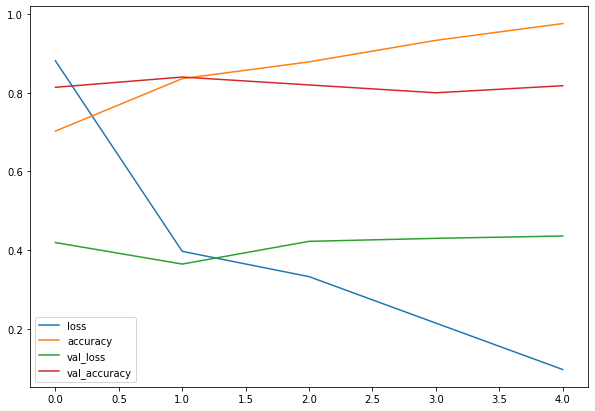

In [23]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10, 7));

In [24]:
# Build CNN model with MaxPool2D

# import modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam

# create model
model_2 = Sequential([
    Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2, padding="valid"),
    
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(2),
    
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile CNN
model_2.compile(loss=binary_crossentropy,
                optimizer=Adam(),
                metrics=["accuracy"])

# model summary
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_8 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_10 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [25]:
# fit the model
history_2 = model_2.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 4s 68ms/step - loss: 0.5745 - accuracy: 0.6927 - val_loss: 0.3970 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 3s 66ms/step - loss: 0.4388 - accuracy: 0.8027 - val_loss: 0.3610 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 3s 64ms/step - loss: 0.4131 - accuracy: 0.8207 - val_loss: 0.3536 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 3s 66ms/step - loss: 0.3793 - accuracy: 0.8313 - val_loss: 0.3328 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 3s 66ms/step - loss: 0.3704 - accuracy: 0.8440 - val_loss: 0.3260 - val_accuracy: 0.8640


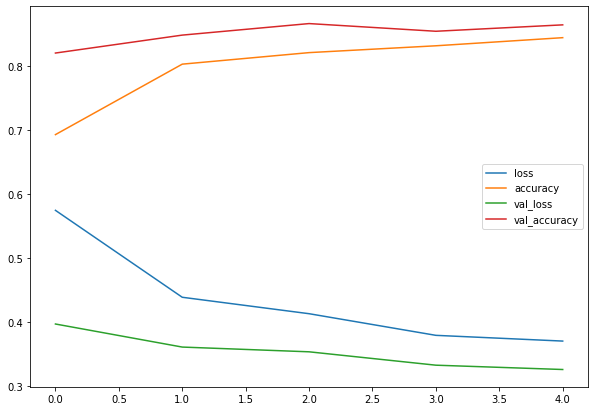

In [26]:
pd.DataFrame(history_2.history).plot(figsize=(10, 7));